In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')

First is to review the columns.

The Location values are so dirty and has got so many unique values, SO this column shoudn't be used as a feature.  
The keyword values are less dirty, and has got less unique values, so this column can be used as a feature.

Also we can see that the unique values of keyword in train and test set are the same, something that does not happen in the train set.

In [11]:
# Train set
print('Number of unique values in location:', train_data['location'].value_counts().shape[0])
print('Number of unique values in keyword:', train_data['keyword'].value_counts().shape[0])

Number of unique values in location: 3341
Number of unique values in keyword: 221


In [12]:
# Test set
print('Number of unique values in location:', test_data['location'].value_counts().shape[0])
print('Number of unique values in keyword:', test_data['keyword'].value_counts().shape[0])

Number of unique values in location: 1602
Number of unique values in keyword: 221


### Meta Features

In [42]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/inmobiliodev/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
# word count
train_data['word_count'] = train_data['text'].apply(lambda x: len(str(x).split()))
test_data['word_count'] = test_data['text'].apply(lambda x: len(str(x).split()))

# unique word count
train_data['unique_word_count'] = train_data['text'].apply(lambda x: len(set(str(x).split())))
test_data['unique_word_count'] = test_data['text'].apply(lambda x: len(set(str(x).split())))

# stop words count
train_data['stop_words_count'] = train_data['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
test_data['stop_words_count'] = test_data['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url count
train_data['url_count'] = train_data['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
test_data['url_count'] = test_data['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length promedio de la longitud de las palabras
train_data['mean_word_length'] = train_data['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test_data['mean_word_length'] = test_data['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# character count
train_data['char_count'] = train_data['text'].apply(lambda x: len(str(x)))
test_data['char_count'] = test_data['text'].apply(lambda x: len(str(x)))

# punctuation count
train_data['punctuation_count'] = train_data['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
test_data['punctuation_count'] = test_data['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag count
train_data['hashtag_count'] = train_data['text'].apply(lambda x: len([c for c in str(x) if c=='#']))
test_data['hashtag_count'] = test_data['text'].apply(lambda x: len([c for c in str(x) if c=='#']))

# Mention_count
train_data['mention_count'] = train_data['text'].apply(lambda x: len([c for c in str(x) if c=='@']))
test_data['mention_count'] = test_data['text'].apply(lambda x: len([c for c in str(x) if c=='@']))

In [44]:
train_data.head()

,id,keyword,location,text,target,word_count,unique_word_count,stop_words_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,0,4.384615,69,1,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,7,0,0,4.571429,38,1,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,20,11,0,5.090909,133,3,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,8,1,0,7.125000,65,2,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7,0,4.500000,88,2,2,0


In [31]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

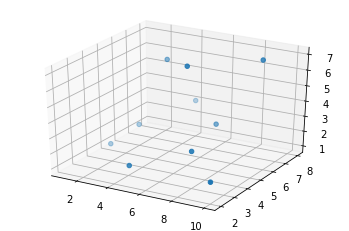

In [39]:
# Puntos
x = [1,2,3,4,5,6,7,8,9,10]
y = [5,6,7,8,2,5,6,3,7,2]
z = [1,2,6,3,2,7,3,3,7,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)